In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Creating Connection to MySQL
conn = mysql.connector.connect(host = "localhost",
                            username = "root",
                            password = "kalpit",
                            database = "ecommerce",
                            port = 3306)

In [3]:
# Creating Cursor Object
cursor = conn.cursor()

In [4]:
# Checking Data
query = """ 
        SELECT * FROM Orders 
                            """
cursor.execute(query)

data = cursor.fetchall()

df = pd.DataFrame(data)
df.head()

,0,1,2,3,4,5,6,7
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


######

######

### List all unique cities where customers are located.

In [5]:
query = """ select distinct customer_city from customers """
cursor.execute(query)

data = cursor.fetchall()
#data

df = pd.DataFrame(data, columns=["cities"])
df

,cities
0,franca
1,sao bernardo do campo
2,sao paulo
3,mogi das cruzes
4,campinas
...,...
4114,siriji
4115,natividade da serra
4116,monte bonito
4117,sao rafael


######

### Count the number of orders placed in 2017.

In [6]:
query = """ 
        SELECT COUNT(*) "Number of Orders" from Orders WHERE YEAR(order_purchase_timestamp)=2017; 
        """
cursor.execute(query)

data = cursor.fetchall()
#data

df = pd.DataFrame(data)
#df
#df[0][0]

print(f"'Number of Orders placed in 2017' ==> {df[0][0]}")

'Number of Orders placed in 2017' ==> 45101


######

### Count the Number of Customers from each state.

In [7]:
query = """ 
        SELECT Customer_State, COUNT(*) FROM Customers GROUP BY Customer_State;
        """
cursor.execute(query)

data = cursor.fetchall()
#data

df = pd.DataFrame(data, columns=["State", "Count"])
df.sample(5)

,State,Count
26,RR,46
13,DF,2140
8,ES,2033
18,AP,68
11,MS,715


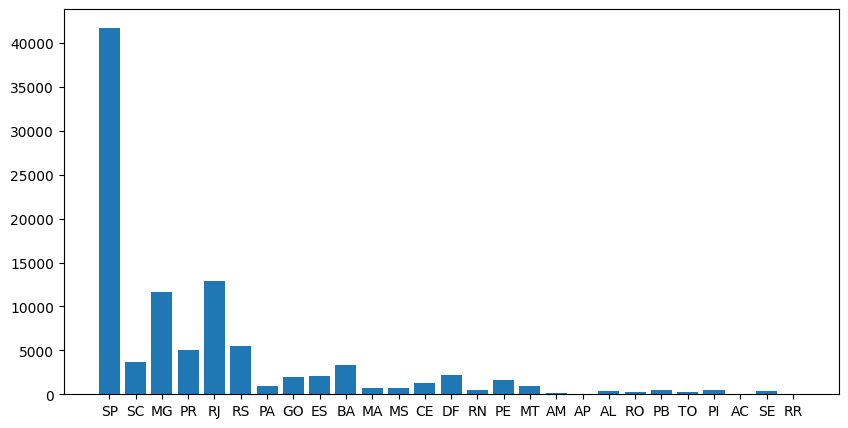

In [8]:
x = df["State"]
y = df["Count"]

plt.figure(figsize=(10, 5))
plt.bar(x,y)
plt.show()

######

### Calculate the percentage of orders that were paid in installments.

In [9]:
query = """ 
        SELECT CONCAT((SUM(CASE WHEN payment_installments > 1 THEN 1 ELSE 0 END) / COUNT(*))*100, " %") 
    	   AS Installment_Ratio
        FROM Payments; 
        """
cursor.execute(query)

data = cursor.fetchall()
#data

df = pd.DataFrame(data)
#df
#df[0][0]
print(f"'Percentage of Orders that were paid in Installments' ==> {df[0][0]}")

'Percentage of Orders that were paid in Installments' ==> 49.4176 %


######

### Find the total sales per category.

######

### Calculate the number of orders per month in 2018.

In [10]:
query = """ 
        SELECT 
            MONTHNAME(order_purchase_timestamp) "Month", 
            COUNT(*) "Order_Count"
        FROM Orders 
        WHERE 
            YEAR(order_purchase_timestamp)=2018
        GROUP BY 
            MONTHNAME(order_purchase_timestamp);
        """
cursor.execute(query)

data = cursor.fetchall()
#data

df = pd.DataFrame(data, columns=["Month", "Order_Count"])
df

,Month,Order_Count
0,July,6292
1,August,6512
2,February,6728
3,June,6167
4,March,7211
5,January,7269
6,May,6873
7,April,6939
8,September,16
9,October,4


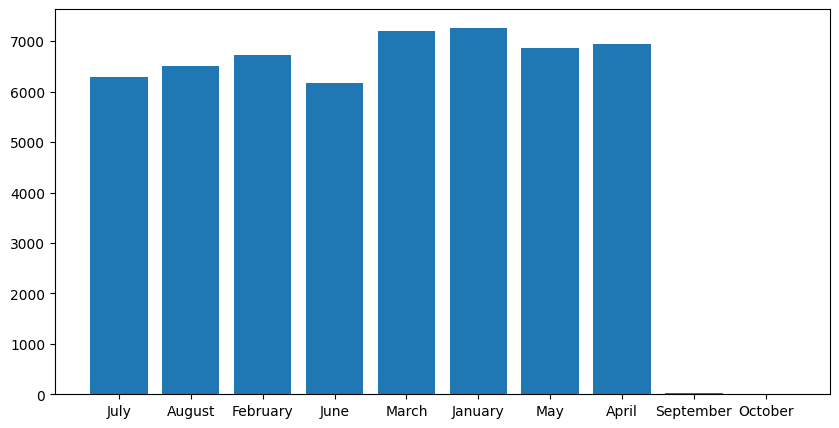

In [11]:
x = df["Month"]
y = df["Order_Count"]

plt.figure(figsize=(10, 5))
plt.bar(x,y)
plt.show()

######

### Find the average number of products per order, grouped by customer city.